<div style="background-color: aquamarine; border-radius: 25px; display: flex; justify-content: center; align-items: center; ">
        <img src="./img/h-m-re.png" style="width: 100px;" alt="">
        <p style="text-align: center; font-size: 40px; color:black;"> Exercise - 5</p>
    </div>

<div style="background-color: aquamarine; border-radius: 25px; display: flex; justify-content: center; align-items: center; flex-direction: column;">
        <img src="./img/marketing-ad-icon.jpg" style="width: 80%; margin-top: 15px;" alt="">
        <p style="text-align: center; font-size: 40px; color:black"> The attached data set (csv.AB_marketing) shows an online store that
            Implemented an advertising campaign to increase sales. This campaign is in the group_test column
            It is clear. In fact, each of the users of the online store has a row of the data collection
            They are either in the ads category or in the psa category. People who are placed in ads category have seen advertisements and people who are placed in psa category have seen advertisements.
            have not seen
            In the CONVERTED column, it is specified whether each of the users (rows) made a purchase or not.
            Using interpretive statistics, check if viewing the ad had an impact on users buying from our store or not?</p>
    </div>

 <div style="background-color: aquamarine; border-radius: 25px; display: flex; justify-content: center; align-items: center;  ">
        <img src="./img/lib-re.png" style="width: 100px; margin-top: 15px;" alt="">
        <p style="text-align: center; font-size: 40px; color:black;"> IMPORTING LIBRARY</p>
    </div>

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

<div>
        <img src="./img/data-vs-information.jpg" style="width: 100%; border-radius: 30px;">
</div>

In [3]:
df = pd.read_csv('marketing_AB.csv')


<div style="position: relative;">
        <img src="./img/profit-and-loss-dashboard.png" style="width: 100%; border-radius:50px; " alt="">
        <p style="position: absolute; top: 70px; left: 70px; font-size: 50px; color: black; font-weight: bolder;">DATA OVERVIEW</p>
    </div>

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color:black;"> SHAPE :</p>
    </div

In [4]:
rows,col = df.shape
print("rows : ", rows)
print("clos : ", col)

rows :  588101
clos :  7


<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> INFO :</p>
    </div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   group          588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> HEAD :</p>
    </div>

In [6]:
df.head()

,Unnamed: 0,user id,group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


 <div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> DESCRIBE :</p>
    </div>

In [7]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


<div>
        <img src="./img/clean.png" style="width: 100%; border-radius: 30px;" alt="">
    </div>

In [8]:
df.isnull().any()

Unnamed: 0       False
user id          False
group            False
converted        False
total ads        False
most ads day     False
most ads hour    False
dtype: bool

In [9]:
df.isnull().sum()

Unnamed: 0       0
user id          0
group            0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

 <div style="">
        <img src="./img/data-infre.png" style="width: 800PX; margin-left: 300PX; border-radius:50px" alt="">
    </div>

In [10]:
type(df['converted'])

pandas.core.series.Series

In [11]:
df['converted'].mean()

0.02523886203220195

In [12]:
data = df['converted'].astype(int)

In [13]:
data.mean()

0.02523886203220195

In [14]:
df.nunique()

Unnamed: 0       588101
user id          588101
group                 2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [15]:
data.describe()

count    588101.000000
mean          0.025239
std           0.156850
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: converted, dtype: float64

In [16]:
data.mean()*100

2.523886203220195

In [17]:
data1_ads = df.query('group == "ad"')
data2_psa = df.query('group == "psa"') 

In [18]:
data1_ads['converted'].mean() * 100

2.5546559636683748

In [19]:
data2_psa['converted'].mean() * 100

1.785410644448223

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; padding-top:30px; color:black;"> با توجه به نتایج به این نتیجه رسیدیم که
            این کمپین تبلیغاتی باعث افزایش فروش شده است.
            حال باید دید این افزایش فروش از نظر آماری معنادار است یا خیر؟</p>
        <br>
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color:black; padding-bottom:30px;">
            According to the results, we came to the conclusion that this advertising campaign has increased sales.
            Now we have to see if this increase in sales is statistically significant or not.
        </p>
    </div>

<Axes: >

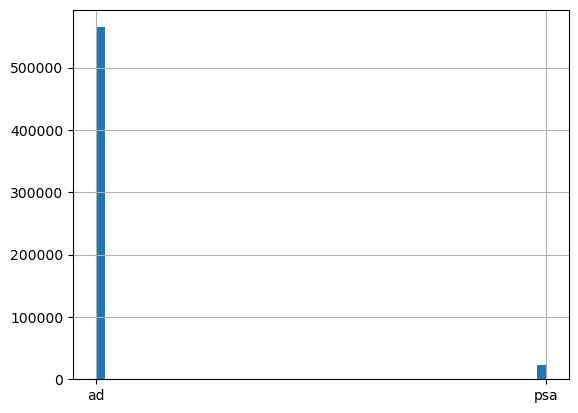

In [20]:
df['group'].hist(bins=50)

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; padding-top:30px; color: black;"> داده های ما از توزیع نرمال پیروی نمیکنند .
            پس مجبوریم از یکی از این دو تست زیر استفاده کنیم تا متوجه بشویم این افزایش فروش از لحاظ آماری معنادار هست یا نه ؟
            <br> U-test or AB-test</p>
        <br>
        <p style="text-align: center; font-size: 40px; font-weight: bolder; padding-bottom: 30px; color: black;">
            Because our data does not follow the normal distribution. We cannot use T-test.
            So we have to use either U-test or AB-test
        </p>
    </div>

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; color: black;"> AB-test :</p>
    </div>

In [21]:
convert_new_ads = np.random.binomial(len(data1_ads), data.mean(), 10000) / len(data1_ads)
convert_new_ads

array([0.02533755, 0.02503467, 0.02515689, ..., 0.02514449, 0.02484161,
       0.0251622 ])

In [22]:
convert_old_psa = np.random.binomial(len(data2_psa), data.mean(), 10000) / len(data2_psa)
convert_old_psa

array([0.02469818, 0.02469818, 0.02457065, ..., 0.02474069, 0.02512328,
       0.02452814])

In [23]:
p_dif = convert_new_ads - convert_old_psa
p_dif

array([ 0.00063937,  0.00033649,  0.00058624, ...,  0.0004038 ,
       -0.00028167,  0.00063406])

In [24]:
p_dif.mean()

4.051816861826757e-06

In [25]:
data_AB_dif = data1_ads['converted'].mean() - data2_psa['converted'].mean()
data_AB_dif

0.007692453192201517

In [26]:
(p_dif > data_AB_dif).mean() * 100

0.0

In [27]:
(p_dif < data_AB_dif).mean() * 100

100.0

<div style="background-color: aquamarine; border-radius: 25px;">
        <p style="text-align: center; font-size: 40px; font-weight: bolder; padding-top:30px; color: black;"> با گرفتن
            اختلاف از عدد تبلیغ دیده شده از عدد تبلیغ دیده نشده متوجه میشویم که تاثیر مثبت بوده .
            و همین طور که میبینیم عدد شانس نزدیک به صفر و خود صفر است .
            پس به این نتیجه میرسیم که احتمال شانسی بودن این افزایش فروش با هر حد آستانه ایی ممکن نیست . و از لحاظ آماری
            معنادار است. ّ</p>
        <br>
        <p style="text-align: center; font-size: 40px; font-weight: bolder; padding-bottom: 30px; color: black;">
            By taking the difference between the number of advertisements seen and the number of advertisements not
            seen, we realize that the effect was positive.
            And as we can see, the chance number is close to zero and zero itself.
            So we come to the conclusion that the chance of this increase in sales is not possible with any threshold.
            And it is statistically significant.
        </p>
    </div>

In [ ]:
#Peyman Radmanesh

#peyman